<a href="https://colab.research.google.com/github/cleanandshine-dev/AIFFEL-Quest/blob/main/Ouest05_AARRR%EB%B6%84%EC%84%9D%2C%ED%86%B5%EA%B3%84%EB%B6%84%ED%8F%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  AARRR 문제
E-commere  플랫폼 기업에 입사해, 데이터사이언티스트의 역할로 비즈니스 지표를 정의하고 분석보고서를 내는 프로젝트에 참여🌱

## 데이터셋 설명
- 2년동안의 실제 온라인 거래 데이터셋
- 데이터 출처: https://archive.ics.uci.edu/dataset/502/online+retail+ii

## 문제1: 데이터 로드 및 탐색
- **데이터의 첫 5개 행을 출력**하여 데이터 형식을 확인하세요.
- **데이터프레임의 컬럼 정보**와 **결측치 여부**를 확인하고 전처리 전략을 고민해보세요.


In [ ]:
# 구글 드라이브와 연동
from google.colab import drive
drive.mount('/content/drive')

# 파일 경로 수정
import os
print('os.getcwd():',os.getcwd())
os.chdir('/content/drive/MyDrive/Colab Notebooks')
print('os.getcwd():',os.getcwd())

Mounted at /content/drive
os.getcwd(): /content
os.getcwd(): /content/drive/MyDrive/Colab Notebooks


In [ ]:
# 데이터셋 불러오기
import pandas as pd

retail_dicts = pd.read_excel('online_retail_II.xlsx', sheet_name=[0, 1])
df0 = retail_dicts[0]
df1 = retail_dicts[1]

In [ ]:
# 두 데이터셋 합치기
df = pd.concat([df0, df1]).reset_index(drop=True)

In [ ]:
# 데이터셋 확인 - 2009년에서 2011년까지의 데이터가 있는지 확인
display(df.head(2))
display(df.tail(2))

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


In [ ]:
# 데이터의 첫 5개 행 출력
display(df.head(5))
print(f'데이터 크기: {df.shape}')
df.info()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


데이터 크기: (1067371, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


- 간략한 컬럼정보
  - Invoice: 6자리의 송장번호. 앞에 c가 붙으면 취소건. / object
  - Stockcode: 5자리 숫자의 물품코드 / object
  - Description: 물품이름 / object
  - Quantity: 거래마다 각 물품의 수량 / int
  - InvoiceDate: 거래발생날짜와 시간 / datetime
  - UnitPrice: 단위 당 가격 / float
  - Customer ID: 5자리 숫자의 고객번호 / float
  - Country: 거주하는 국가 / object


In [ ]:
# 결측치 확인
df.isna().sum().sort_values(ascending = False)

,0
Customer ID,243007
Description,4382
Invoice,0
StockCode,0
Quantity,0
InvoiceDate,0
Price,0
Country,0



- 결측치
  - `Description`와 `Customer ID`에 결측치가 존재한다.


## 문제2: 데이터 전처리
- **`InvoiceDate`** 컬럼을 날짜 형식으로 변환하고, **`Customer ID`**에 결측치가 있는 행을 제거하세요.
- **`Customer ID`**를 정수형으로 변환한 후, **`InvoiceDate`**를 기준으로 데이터를 정렬하세요.
- 금액을 나타내는 새로운 컬럼 **`Total`** 을 생성하세요 (`Quantity`와 `Price`를 곱한 값).

In [ ]:
# InvoiceDate 컬럼을 날짜 형식으로 변환(시간 제거)
df['InvoiceDate'] = df['InvoiceDate'].dt.date  # 날짜형 -> 문자형
df['InvoiceDate']= pd.to_datetime(df['InvoiceDate'])  # 문자형 -> 날짜형

print('InvoiceDate 데이터타입: {}'.format(df['InvoiceDate'].dtype))
df['InvoiceDate'].head()

InvoiceDate 데이터타입: datetime64[ns]


,InvoiceDate
0,2009-12-01
1,2009-12-01
2,2009-12-01
3,2009-12-01
4,2009-12-01


In [ ]:
# Customer ID에 결측치 행 제거
print(f"Customer ID에 결측치 행 제거 전 데이터 크기: {df.shape} ")
df.dropna(subset ='Customer ID', inplace=True)
print(f"Customer ID에 결측치 행 제거 후 데이터 크기: {df.shape} ")

Customer ID에 결측치 행 제거 전 데이터 크기: (1067371, 8) 
Customer ID에 결측치 행 제거 후 데이터 크기: (824364, 8) 


In [ ]:
# Customer ID을 정수형으로 변경
df['Customer ID'] = df['Customer ID'].astype(int)
print("Customer ID 데이터 타입: ", df['Customer ID'].dtype)

Customer ID 데이터 타입:  int64


In [ ]:
# InvoiceDate를 기준으로 데이터를 정렬
df = df.sort_values('InvoiceDate').reset_index(drop=True)
display(df.head(3))
display(df.tail(3))

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085,United Kingdom
1,489574,22083,PAPER CHAIN KIT RETRO SPOT,5,2009-12-01,2.95,13097,United Kingdom
2,489574,22125,UNION JACK HOT WATER BOTTLE,2,2009-12-01,5.95,13097,United Kingdom


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
824361,581496,72800E,4 IVORY DINNER CANDLES SILVER FLOCK,12,2011-12-09,0.79,16558,United Kingdom
824362,581494,22549,PICTURE DOMINOES,12,2011-12-09,1.45,12518,Germany
824363,581587,POST,POSTAGE,1,2011-12-09,18.00,12680,France


In [ ]:
# 금액을 나타내는 컬럼 Total 생성
df['Total'] = df['Quantity']*df['Price']
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085,United Kingdom,83.40
1,489574,22083,PAPER CHAIN KIT RETRO SPOT,5,2009-12-01,2.95,13097,United Kingdom,14.75
2,489574,22125,UNION JACK HOT WATER BOTTLE,2,2009-12-01,5.95,13097,United Kingdom,11.90
3,489574,22088,PAPER BUNTING COLOURED LACE,1,2009-12-01,2.95,13097,United Kingdom,2.95
4,489574,22093,MOTORING TISSUE BOX,3,2009-12-01,1.25,13097,United Kingdom,3.75


### 추가



- 다른 컬럼들에도 비정상적인 값들이 없는지 확인해본다.
  - Invoice: 6자리의 숫자 또는 앞에 c가 붙은 송장번호이외에 존재하는 송장번호가 있는지 확인
  - Stockcode: 5자리 숫자에서 문자가 섞여들어간 부분이 있는지 확인
  - Country: 국가가 아닌 문자열이 포함되었는지 확인


In [ ]:
# 범주형 자료에 대한 기술통계량
df.describe(include = 'O')

,Invoice,StockCode,Description,Country
count,824364,824364,824364,824364
unique,44876,4646,5299,41
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,542,5322,5315,741301


In [ ]:
# Invoice
# 6자리의 숫자 또는 앞에 c가 붙은 송장번호이외에 존재하는 송장번호가 있는지 확인
conds = (df['Invoice'].astype(str).str.startswith('C')) | (df['Invoice'].astype(str).str.isdigit())
df[~conds]  # 없는 걸로 확인

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total


In [ ]:
# Stockcode
# 5자리 숫자에서 문자가 섞여들어간 부분이 있는지 확인
df_stockcode_char = df[~df['StockCode'].astype(str).str.isdigit()]
df_stockcode_char.groupby('StockCode').size().sort_values(ascending = False)

,0
StockCode,
85123A,5322
85099B,3446
POST,2019
82494L,1886
85099F,1580
...,...
90025B,1
90187A,1
72796C,1


- 문자가 섞인 데이터가 많고, 의미있는 데이터일 가능성이 있어 삭제하지 않음

In [ ]:
# Country
# 국가가 아닌 문자열이 포함되었는지 확인
df['Country'].value_counts()

,count
Country,
United Kingdom,741301
Germany,17624
EIRE,16195
France,14202
Netherlands,5140
Spain,3811
Belgium,3123
Switzerland,3064
Portugal,2504


In [ ]:
# Unspecified인 국가명 확인
df.loc[df['Country']=='Unspecified']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
42770,494860,85014B,RED/WHITE DOTS RUFFLED UMBRELLA,2,2010-01-19,5.95,12470,Unspecified,11.90
42771,494860,85014A,BLACK/BLUE DOTS RUFFLED UMBRELLA,1,2010-01-19,5.95,12470,Unspecified,5.95
42772,494860,85014D,PINK/BROWN DOTS RUFFLED UMBRELLA,1,2010-01-19,5.95,12470,Unspecified,5.95
42773,494860,84836,ZINC METAL HEART DECORATION,5,2010-01-19,1.25,12470,Unspecified,6.25
42774,494860,84832,ZINC WILLIE WINKIE CANDLE STICK,5,2010-01-19,0.85,12470,Unspecified,4.25
...,...,...,...,...,...,...,...,...,...
641463,563947,23234,BISCUIT TIN VINTAGE CHRISTMAS,24,2011-08-22,2.89,12363,Unspecified,69.36
641464,563947,22950,36 DOILIES VINTAGE CHRISTMAS,12,2011-08-22,1.45,12363,Unspecified,17.40
641465,563947,22952,60 CAKE CASES VINTAGE CHRISTMAS,36,2011-08-22,0.55,12363,Unspecified,19.80
641466,563947,23318,BOX OF 6 MINI VINTAGE CRACKERS,12,2011-08-22,2.49,12363,Unspecified,29.88


In [ ]:
# Unspecified인 국가명으로 된 주문이 전체에서 차지하는 비율
df.loc[df['Country']=='Unspecified', 'Invoice'].nunique() / df['Invoice'].nunique()
# df.loc[df['Country']=='Unspecified', 'Invoice'].shape[0] / df['Invoice'].shape[0]

0.00042338889384080575

매우 작은 비율을 차지하므로 삭제해준다.

In [ ]:
# 국가가 Unspecified인 데이터 삭제
print(f'삭제 전 데이터크기: {df.shape}')
df = df[~(df['Country'] == 'Unspecified')]
print(f'삭제 후 데이터크기: {df.shape}')

삭제 전 데이터크기: (824364, 9)
삭제 후 데이터크기: (823840, 9)



- 아래 변수에 대해서는 각 수치형 변수가 정상 범위에 있는지 확인해본다.
  - Quantity: 거래마다 각 물품의 수량 / int
  - InvoiceDate: 거래발생날짜와 시간 / datetime
  - UnitPrice: 단위 당 가격 / float
  - Customer ID: 5자리 숫자의 고객번호 / float


In [ ]:
# 수치형 자료에 대한 기술통계량
df.describe()

,Quantity,InvoiceDate,Price,Customer ID,Total
count,823840.000000,823840,823840.000000,823840.000000,823840.000000
mean,12.416276,2011-01-01 09:21:24.925227520,3.675605,15325.104574,20.199208
min,-80995.000000,2009-12-01 00:00:00,0.000000,12346.000000,-168469.600000
25%,2.000000,2010-07-06 00:00:00,1.250000,13975.000000,4.250000
50%,5.000000,2010-12-03 00:00:00,1.950000,15257.000000,11.250000
75%,12.000000,2011-07-27 00:00:00,3.750000,16797.000000,19.500000
max,80995.000000,2011-12-09 00:00:00,38970.000000,18287.000000,168469.600000
std,189.035981,NaN,70.251510,1697.361569,308.780044


In [ ]:
# price가 0인 데이터 확인
df[df['Price'] == 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
2403,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02,0.0,16126,United Kingdom,0.0
6339,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03,0.0,15658,United Kingdom,0.0
11818,490727,M,Manual,1,2009-12-07,0.0,17231,United Kingdom,0.0
13237,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08,0.0,14108,United Kingdom,0.0
13238,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08,0.0,14108,United Kingdom,0.0
...,...,...,...,...,...,...,...,...,...
776369,577129,22464,HANGING METAL HEART LANTERN,4,2011-11-17,0.0,15602,United Kingdom,0.0
778501,577314,23407,SET OF 2 TRAYS HOME SWEET HOME,2,2011-11-18,0.0,12444,Norway,0.0
779515,577168,M,Manual,1,2011-11-18,0.0,12603,Germany,0.0
785967,577696,M,Manual,1,2011-11-21,0.0,16406,United Kingdom,0.0


- 주로 사은품이지 않을까...? 존재하는 데이터가 많지 않으므로 삭제해준다.

In [ ]:
# price가 0인 데이터 삭제
print(f'삭제 전 데이터크기: {df.shape}')
df = df[df['Price'] > 0]
print(f'삭제 후 데이터크기: {df.shape}')

삭제 전 데이터크기: (823840, 9)
삭제 후 데이터크기: (823769, 9)


In [ ]:
# Quantity데이터의 최솟값과 최댓값 확인 -> 같은 사람이 거래한건지 확인
display(df[df['Quantity'] == df['Quantity'].max()])
display(df[df['Quantity'] == df['Quantity'].min()])

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
824098,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09,2.08,16446,United Kingdom,168469.6


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
824099,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09,2.08,16446,United Kingdom,-168469.6


마지막으로 Description이 결측치인 데이터를 확인해본다.

In [ ]:
#  Description이 결측치인 데이터 확인
df[df['Description'].isna()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total


In [ ]:
df.isna().sum()

,0
Invoice,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
Price,0
Customer ID,0
Country,0
Total,0


다른 데이터를 삭제하면서 Description의 결측치가 모두 제거되었다.

## 문제3: 나라별 구매인원 시각화
Country 컬럼을 기준으로 Customer ID의 유니크한 값을 계산하여 나라별 구매 고객 수를 시각화 해보세요.

In [ ]:
# 나라별 구매인원 계산
customers_by_country = df.groupby('Country')['Customer ID'].nunique().sort_values(ascending=False)
customers_by_country

,Customer ID
Country,
United Kingdom,5407
Germany,107
France,95
Spain,41
Belgium,29
Portugal,24
Netherlands,23
Switzerland,22
Sweden,19


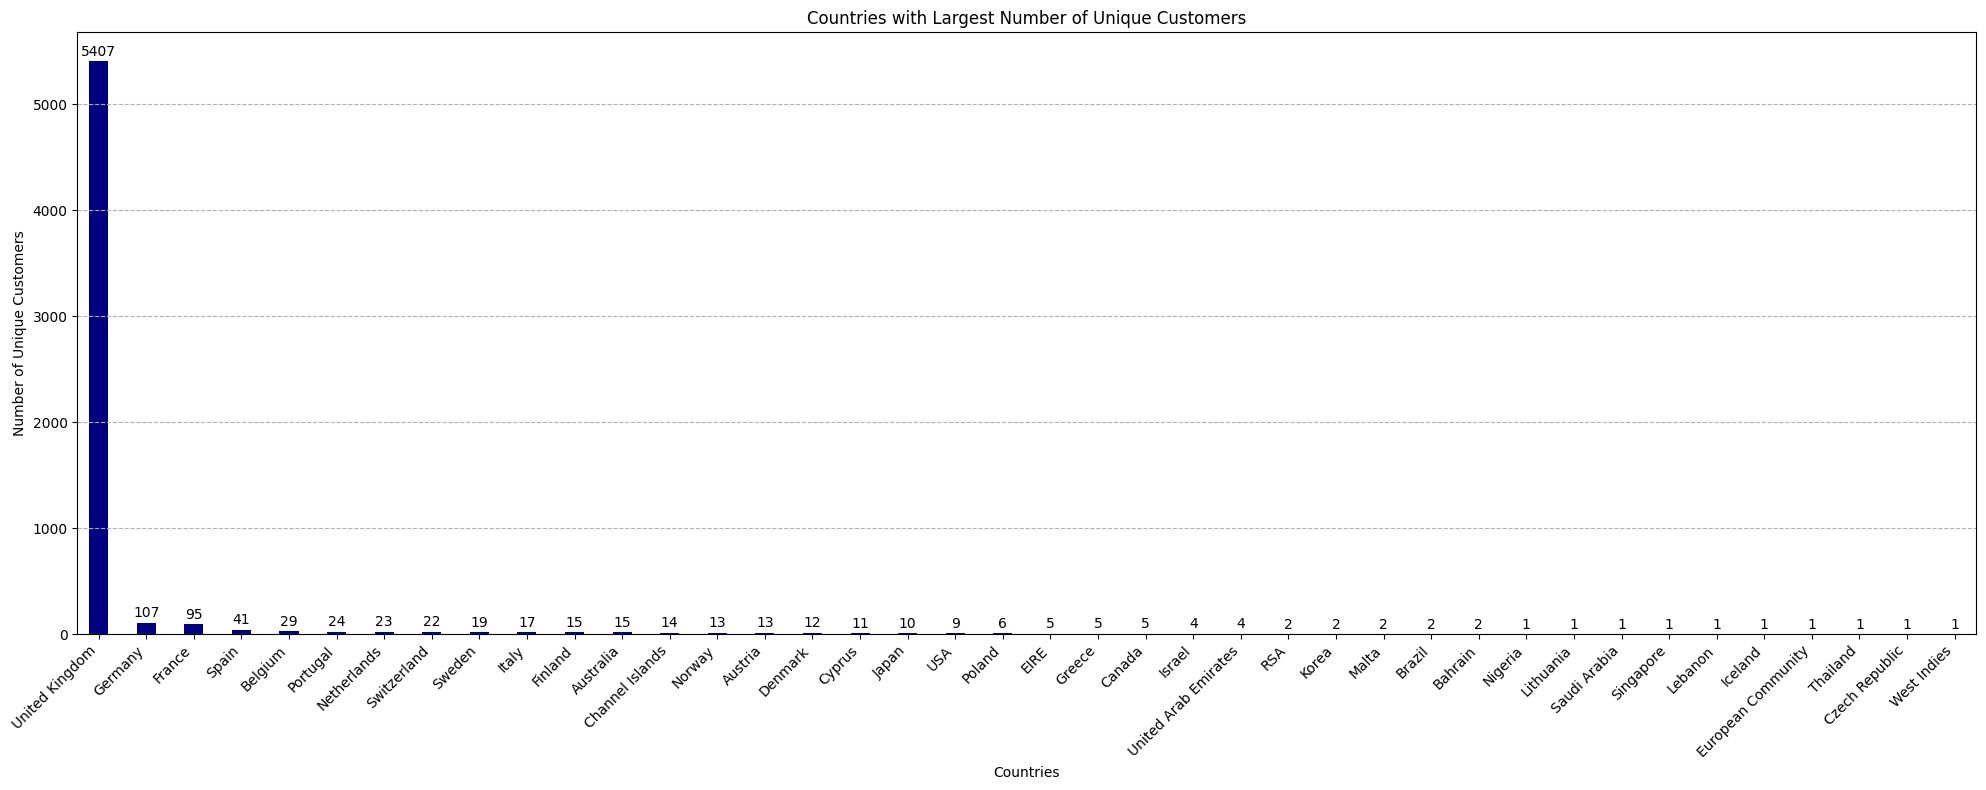

In [ ]:
# 나라별 고객 수 시각화
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 8))

# sns.barplot(customers_by_countries)
customers_by_country.plot(kind='bar', width=0.4, colormap = 'jet')
plt.title('Countries with Largest Number of Unique Customers')
plt.xlabel('Countries')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=45, ha='right')

# bar 위에 수치 표시
for index, value in enumerate(customers_by_country):
    plt.text(index, value + 50, str(value), ha='center', fontsize=10)  # bar 위에 위치 조정

plt.grid(axis='y', linestyle ='--')
plt.tight_layout()
plt.show()

## 문제4: Acqusition(고객 유입 분석)
- 신규 고객 분석을 위해 고객의 **첫 구매 시점**을 기준으로 월별 신규 유입 고객 수를 계산하세요.
- 각 고객의 첫 구매 날짜를 추출하고, **월별 신규 고객 수**를 시각화하세요.

In [ ]:
# 고객별 첫 구매일자 추출
first_date = df.groupby('Customer ID')['InvoiceDate'].min()

df['first_date'] = df['Customer ID'].apply(lambda x: first_date[x])

In [ ]:
display(df.head())
display(df.tail())

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,first_date
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085,United Kingdom,83.40,2009-12-01
1,489574,22083,PAPER CHAIN KIT RETRO SPOT,5,2009-12-01,2.95,13097,United Kingdom,14.75,2009-12-01
2,489574,22125,UNION JACK HOT WATER BOTTLE,2,2009-12-01,5.95,13097,United Kingdom,11.90,2009-12-01
3,489574,22088,PAPER BUNTING COLOURED LACE,1,2009-12-01,2.95,13097,United Kingdom,2.95,2009-12-01
4,489574,22093,MOTORING TISSUE BOX,3,2009-12-01,1.25,13097,United Kingdom,3.75,2009-12-01


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,first_date
824359,581496,22664,TOY TIDY DOLLY GIRL DESIGN,20,2011-12-09,0.79,16558,United Kingdom,15.80,2009-12-03
824360,581496,22721,SET OF 3 CAKE TINS SKETCHBOOK,12,2011-12-09,1.95,16558,United Kingdom,23.40,2009-12-03
824361,581496,72800E,4 IVORY DINNER CANDLES SILVER FLOCK,12,2011-12-09,0.79,16558,United Kingdom,9.48,2009-12-03
824362,581494,22549,PICTURE DOMINOES,12,2011-12-09,1.45,12518,Germany,17.40,2011-08-21
824363,581587,POST,POSTAGE,1,2011-12-09,18.00,12680,France,18.00,2011-08-18


In [ ]:
# 월별 신규 고객 수
new_customers_by_month = df.groupby(by=df['first_date'].dt.to_period('M'))['Customer ID'].nunique() # 년월까지만 표시
new_customers_by_month

,Customer ID
first_date,
2009-12,1045
2010-01,391
2010-02,361
2010-03,436
2010-04,290
2010-05,254
2010-06,269
2010-07,183
2010-08,158


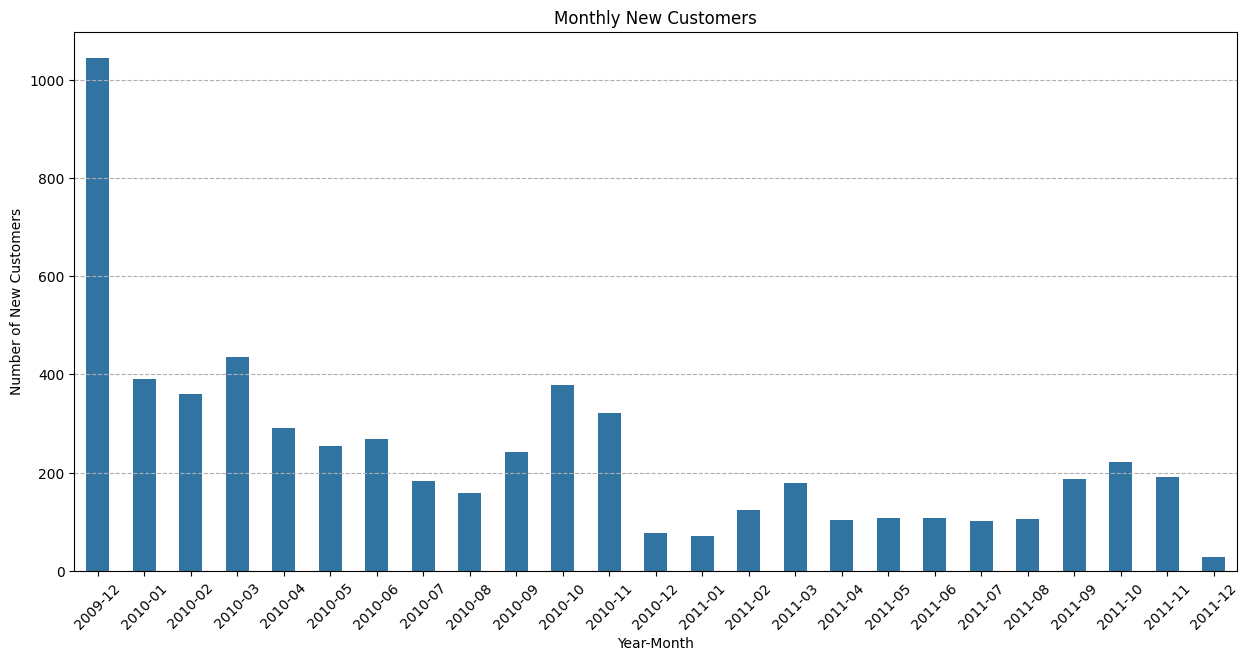

In [ ]:
# 월별 신규 고객수 시각화
import seaborn as sns
plt.figure(figsize=(15,7))

sns.barplot(new_customers_by_month, width=0.5)
plt.xlabel('Year-Month')
plt.ylabel('Number of New Customers')
plt.title('Monthly New Customers')
plt.xticks(rotation=45)
plt.grid(axis = 'y', linestyle='--')
plt.show()

## 문제5: Activation(고객 활성화 분석)
- 모든 고객 중 첫 구매 이후 **총 구매 금액이 특정 기준 금액 (£50)** 이상인 고객을 활성화된 고객으로 정의합니다.
- 전체 고객 수와 활성화된 고객 수를 비교하여 **활성화율**을 도출하세요.

Q1. 첫 구매의 기준?
- 첫 날에 주문한 전체 금액인지? 첫번째 주문(주문번호)으로 들어간 주문인지?
- 만약, 첫 날의 구매를 첫 구매로 한다면, 하루동안 여러번의 주문으로 높은 금액을 결제하고 이후에 이용하지 않은경우에도, 활성화된 고객으로 집계되지 않을까?
- 첫 구매를 하고나서 취소를 하는 경우도 첫 구매로 인정해야할까?  

Q2. 집계과정에 대한 궁금증
- 고객별 총 구매금액이 마이너스의 값이 나오는 경우, 주문하고 취소한 건에 대한 데이터를 없애야 하는 건지(주문데이터와 취소데이터를 모두 없애야 하는건지?)?

+ 그 외에
- 전체고객의 구매금액, 첫 구매의 평균금액, 두번째 이후 구매의 평균금액 등을 비교... 하려고 했으나 취소건으로 인해 비교가 어려움.

In [ ]:
# 고객별 총 구매금액
amounts_by_customer = df.groupby('Customer ID')['Total'].sum().reset_index()
amounts_by_customer.rename(columns={'Total':'total_amount'}, inplace=True)
amounts_by_customer

,Customer ID,total_amount
0,12346,-64.68
1,12347,5633.32
2,12348,2019.40
3,12349,4404.54
4,12350,334.40
...,...,...
5927,18283,2736.65
5928,18284,436.68
5929,18285,427.00
5930,18286,1188.43


In [ ]:
## 첫 날 주문 금액을 첫 구매라고 하는 경우 ##

# 고객별 첫 날 주문금액 구하기
firstday_purchase = df[df['InvoiceDate'] == df['first_date']]
firstday_purchase = firstday_purchase.groupby('Customer ID')['Total'].sum().reset_index()

# 고객별 첫 날 구매 이후 총 구매금액
amounts_by_customer['first_day'] = firstday_purchase['Total']
amounts_by_customer['other_days'] = amounts_by_customer['total_amount'] - amounts_by_customer['first_day']
# amounts_by_customer

num_of_customers = len(amounts_by_customer)
activated_customers = len(amounts_by_customer[amounts_by_customer['other_days'] >= 50])
activated_rate = activated_customers / num_of_customers

print(f'총 고객수: {num_of_customers}')
print(f'활성화된 고객 수(첫 구매 후 ￡50이상 지출한 고객): {activated_customers}')
print(f'고객 활성화율: {activated_rate:.2%}')

총 고객수: 5932
활성화된 고객 수(첫 구매 후 ￡50이상 지출한 고객): 4130
고객 활성화율: 69.62%


In [ ]:
## 첫 날 처음에 한 주문을 첫 구매라고 하는 경우 ##

# 고객별 환불되지 않은(Invoice에 C가 들어가지 않은) 데이터셋만 추출
firsttime_purchase = df[df['Invoice'].astype(str).str.isdigit()]
# firsttime_purchase.shape

# 고객별 첫 주문번호 추출
firsttime_purchase = firsttime_purchase.groupby('Customer ID')['Invoice'].min().reset_index()  # 기존고객수보다 적음

# 주문별 구매금액
prices_by_order = df.groupby('Invoice')['Total'].sum().reset_index()

# 고객별 첫 구매금액
firsttime_purchase = firsttime_purchase.merge(prices_by_order, on='Invoice', how='left')
firsttime_purchase

# 고객별 첫 날 구매 이후 총 구매금액
amounts_by_customer['first_time'] = firsttime_purchase['Total']
amounts_by_customer['other_times'] = amounts_by_customer['total_amount'] - amounts_by_customer['first_time']

# # 첫 구매 기록이 없는 고객에 대해 발생한 결측치 채우기
# amounts_by_customer.fillna(0, inplace=True)
# # amounts_by_customer.isna().sum()

# 정리
num_of_customers = len(amounts_by_customer)
activated_customers = len(amounts_by_customer[amounts_by_customer['other_times'] >= 50])
activated_rate = activated_customers / num_of_customers

print(f'총 고객수: {num_of_customers}')
print(f'활성화된 고객 수(첫 구매 후 ￡50이상 지출한 고객): {activated_customers}')
print(f'고객 활성화율: {activated_rate:.2%}')

총 고객수: 5932
활성화된 고객 수(첫 구매 후 ￡50이상 지출한 고객): 4245
고객 활성화율: 71.56%


In [ ]:
amounts_by_customer.head(3)

,Customer ID,total_amount,first_day,other_days,first_time,other_times
0,12346,-64.68,90.00,-154.68,45.00,-109.68
1,12347,5633.32,611.53,5021.79,611.53,5021.79
2,12348,2019.40,222.16,1797.24,222.16,1797.24


위의 결과가 차이가 난다.=> 하루에 여러번 구매한 고객이 존재하지 않을까?

In [ ]:
# 첫 날 구매한 고객의 주문횟수 구하기
first_purchase_df = df[df['InvoiceDate'] == df['first_date']]
first_purchase_df.groupby('Customer ID')['Invoice'].nunique().sort_values(ascending = False)

,Invoice
Customer ID,
17509,6
15354,6
12592,6
16986,6
12482,5
...,...
14389,1
14388,1
14387,1


하루 최대 6번까지 주문한 고객이 존재함을 알 수 있다.

In [ ]:
# 참고
amounts_by_customer.describe()

,Customer ID,total_amount,first_day,other_days,first_time,other_times
count,5932.000000,5932.000000,5932.000000,5932.000000,5872.000000,5872.000000
mean,15319.047202,2805.279101,396.068998,2409.210103,416.457081,2396.603798
std,1714.914973,13985.339481,924.017891,13736.149441,739.134518,14069.530200
min,12346.000000,-25111.090000,-25111.090000,-6219.760000,1.300000,-28490.750000
25%,13833.750000,326.245000,159.910000,0.000000,168.680000,9.677500
50%,15319.500000,846.050000,291.565000,476.885000,298.075000,510.615000
75%,16804.250000,2183.400000,449.610000,1711.440000,454.352500,1868.907500
max,18287.000000,598215.220000,39237.400000,595928.980000,33167.800000,597836.060000


## 문제6: Retention 코호트 분석(고객)
- 분기별 활성 사용자(MAU)를 분석하여 고객 유지 현황을 파악하세요.
- 분기별 활성 고객 수를 계산하고, 이를 시각화하여 **고객 유지 트렌드**를 분석하세요.

In [ ]:
# first_date로 부터 코호트 년-분기를 나타내는 cohort_quarter 생성
df['cohort_quarter'] = df['first_date'].dt.to_period('Q')

# 구매당시분기를 나타내는 current_quarter 생성
df['current_quarter'] = df['InvoiceDate'].dt.to_period('Q')

# 코호트 시작일로부터 지난 분기수를 나타내는 컬럼 cohort_index 생성
df['cohort_index'] = (df['current_quarter'] - df['cohort_quarter']).apply(lambda x: x.n)

In [ ]:
display(df.head(3))
display(df.tail(3))

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,first_date,cohort_quarter,current_quarter,cohort_index
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085,United Kingdom,83.40,2009-12-01,2009Q4,2009Q4,0
1,489574,22083,PAPER CHAIN KIT RETRO SPOT,5,2009-12-01,2.95,13097,United Kingdom,14.75,2009-12-01,2009Q4,2009Q4,0
2,489574,22125,UNION JACK HOT WATER BOTTLE,2,2009-12-01,5.95,13097,United Kingdom,11.90,2009-12-01,2009Q4,2009Q4,0


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total,first_date,cohort_quarter,current_quarter,cohort_index
824361,581496,72800E,4 IVORY DINNER CANDLES SILVER FLOCK,12,2011-12-09,0.79,16558,United Kingdom,9.48,2009-12-03,2009Q4,2011Q4,8
824362,581494,22549,PICTURE DOMINOES,12,2011-12-09,1.45,12518,Germany,17.40,2011-08-21,2011Q3,2011Q4,1
824363,581587,POST,POSTAGE,1,2011-12-09,18.00,12680,France,18.00,2011-08-18,2011Q3,2011Q4,1


In [ ]:
# 분기별로 유입된 고객 수 구하기
quarter_counts = df.groupby(['cohort_quarter', 'cohort_index'])['Customer ID'].nunique().reset_index()
quarter_counts = quarter_counts.groupby('cohort_quarter')['Customer ID'].transform('max')
# quarter_counts

In [ ]:
# cohort_quarter와 cohort_index를 그룹화하여 Retention 구하기
cohort_retention = df.groupby(['cohort_quarter', 'cohort_index'])['Customer ID'].nunique()
cohort_retention = cohort_retention.to_frame().rename(columns={'Customer ID':'Customers'}).sort_values(by=['cohort_quarter']).reset_index()

cohort_retention['retention_rate'] = cohort_retention['Customers'] / quarter_counts *100
cohort_retention

,cohort_quarter,cohort_index,Customers,retention_rate
0,2009Q4,0,1045,100.000000
1,2009Q4,1,673,64.401914
2,2009Q4,2,688,65.837321
3,2009Q4,3,619,59.234450
4,2009Q4,4,714,68.325359
5,2009Q4,5,525,50.239234
6,2009Q4,6,517,49.473684
7,2009Q4,7,509,48.708134
8,2009Q4,8,572,54.736842
9,2010Q1,7,408,34.343434


In [ ]:
# 시각화를 위한 pivot
cohort_pivot = cohort_retention.pivot_table(index='cohort_quarter', columns='cohort_index', values='retention_rate')
cohort_pivot

cohort_index,0,1,2,3,4,5,6,7,8
cohort_quarter,,,,,,,,,
2009Q4,100.0,64.401914,65.837321,59.234450,68.325359,50.239234,49.473684,48.708134,54.736842
2010Q1,100.0,51.346801,48.148148,51.178451,35.016835,36.195286,37.373737,34.343434,NaN
2010Q2,100.0,39.729397,42.804428,22.509225,30.135301,27.798278,30.012300,NaN,NaN
2010Q3,100.0,48.198971,25.385935,26.586621,32.933105,32.246998,NaN,NaN,NaN
2010Q4,100.0,21.621622,25.225225,20.849421,35.392535,NaN,NaN,NaN,NaN
2011Q1,100.0,42.741935,33.602151,36.559140,NaN,NaN,NaN,NaN,NaN
2011Q2,100.0,44.062500,39.687500,NaN,NaN,NaN,NaN,NaN,NaN
2011Q3,100.0,53.299492,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011Q4,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- heatmap 시각화 참고:  https://selfimprove39.tistory.com/entry/python-seaborn%EC%9C%BC%EB%A1%9C-HeatMap-%EA%B7%B8%EB%A6%AC%EA%B8%B0-2-%EC%B5%9C%EB%8C%80%EA%B0%92%EC%B5%9C%EC%86%8C%EA%B0%92-Cbar-tick-Label-%EC%A1%B0%EC%A0%88%ED%95%98%EC%97%AC-%EA%B7%B8%EB%9E%98%ED%94%84-%EA%B7%B8%EB%A6%AC%EA%B8%B0

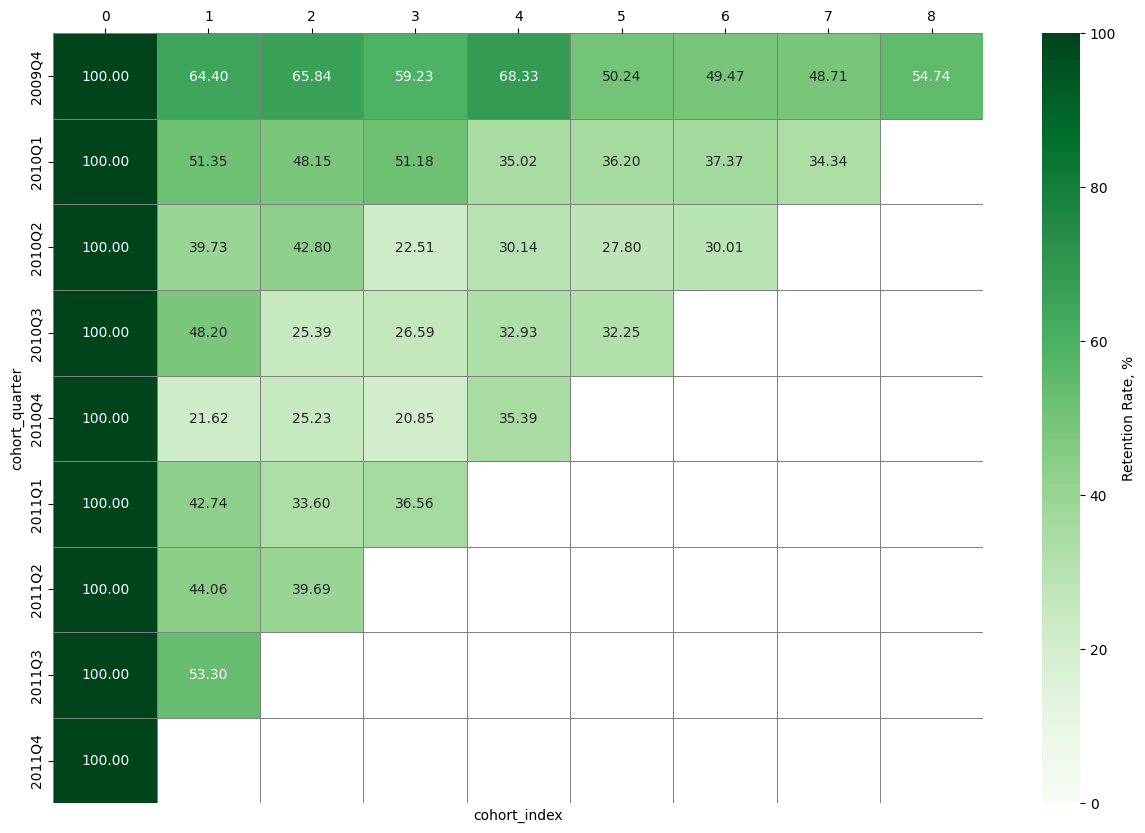

In [ ]:
# heatmap으로 시각화
plt.figure(figsize=(15,10))

heatmap = sns.heatmap(
    data=cohort_pivot,
    annot=True,                # 셀 내부에 값 표시
    fmt='.2f',                 # 텍스트 형식 (소수점 2자리)
    cmap='Greens',             # 색상 팔레트
    cbar_kws={'label': 'Retention Rate, %'},  # 컬러바 제목
    linewidths=0.5,            # 셀 간격
    linecolor='gray',          # 셀 경계 색상
    vmin=0, vmax=100           # Retention Rate의 범위 설정
)
heatmap.xaxis.tick_top()

## 문제7: Retention 코호트 분석(평균구매수량)
- 분기단위의 활성 사용자의 평균 구매수량을 분석하세요
    - 구매수량이기 때문에 0 index의 값이 100% 가 아닌 절대 값임을 주의

Q.사용자의 평균구매수량?
- 사용자가 1번 주문할 때 수량을 말하는 것인가?
- 사용자가 하나의 물품을 구매할 때의 수량을 말하는 것인가? -> 이쪽이 더 의미있는 값이라고 본다.

In [ ]:
# 분기단위의 활성 사용자의 평균 구매수량
cohort_quantity = df.groupby(['cohort_quarter', 'cohort_index'])['Quantity'].mean().reset_index()
cohort_quantity = cohort_quantity.rename(columns = {'Quantity':'mean_Quantity'})
cohort_quantity

,cohort_quarter,cohort_index,mean_Quantity
0,2009Q4,0,12.289799
1,2009Q4,1,21.077306
2,2009Q4,2,13.363236
3,2009Q4,3,15.464376
4,2009Q4,4,13.549497
5,2009Q4,5,15.362272
6,2009Q4,6,14.956008
7,2009Q4,7,15.946939
8,2009Q4,8,14.510001
9,2010Q1,0,9.658472


In [ ]:
# cohort_quantity를 피봇테이블로 표현
cohort_quantity_pivot = cohort_quantity.pivot_table(index='cohort_quarter', columns='cohort_index', values='mean_Quantity')
cohort_quantity_pivot

cohort_index,0,1,2,3,4,5,6,7,8
cohort_quarter,,,,,,,,,
2009Q4,12.289799,21.077306,13.363236,15.464376,13.549497,15.362272,14.956008,15.946939,14.510001
2010Q1,9.658472,11.982994,11.698817,10.865085,10.647523,10.986338,12.962130,10.212419,NaN
2010Q2,10.437568,11.495108,9.811143,15.442831,14.874445,15.813412,9.573412,NaN,NaN
2010Q3,13.855614,7.990542,9.892273,11.935079,14.125486,10.269787,NaN,NaN,NaN
2010Q4,7.618478,8.344081,8.314231,9.525700,8.693680,NaN,NaN,NaN,NaN
2011Q1,9.814703,13.467717,12.559367,11.576981,NaN,NaN,NaN,NaN,NaN
2011Q2,8.812273,11.264507,9.161272,NaN,NaN,NaN,NaN,NaN,NaN
2011Q3,9.266146,6.197705,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011Q4,8.473759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


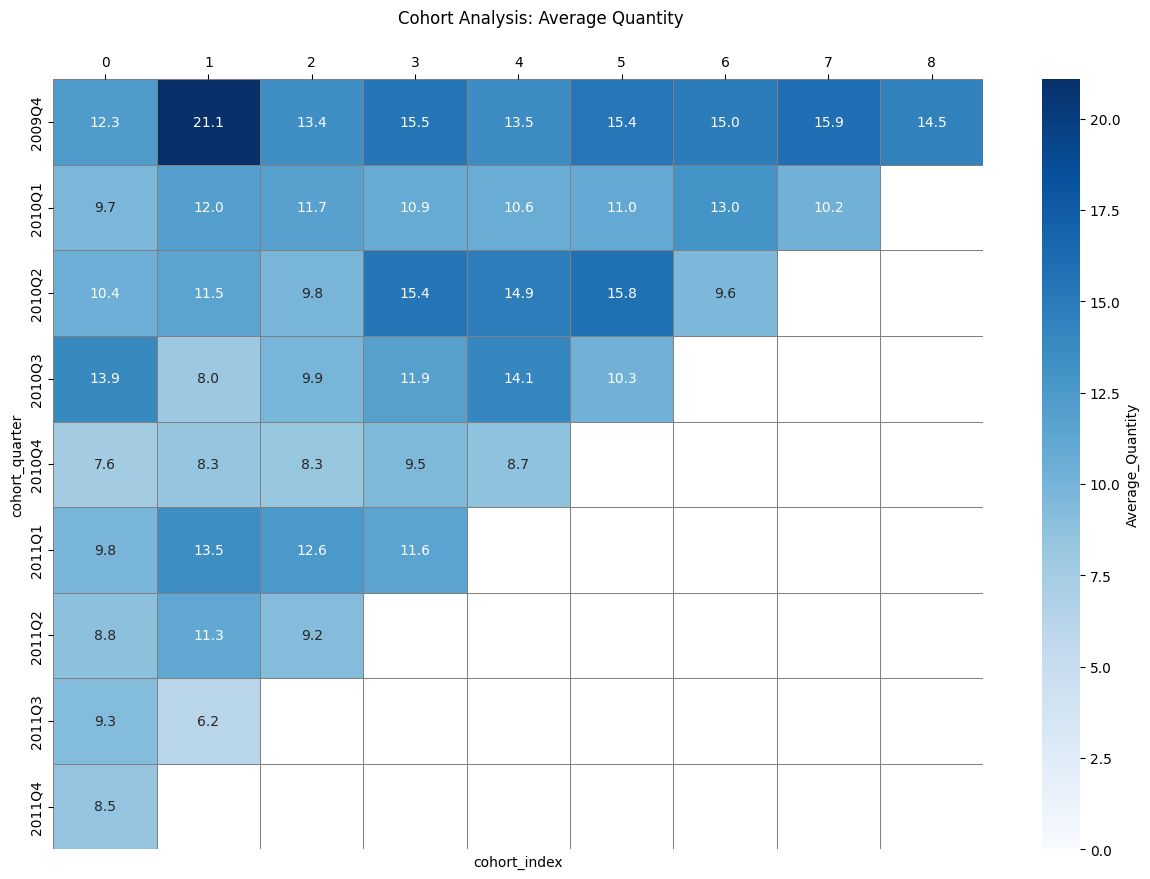

In [ ]:
# heatmap으로 시각화
plt.figure(figsize=(15,10))

quantity_heatmap = sns.heatmap(
    data=cohort_quantity_pivot,
    annot=True,
    fmt='.1f',
    cmap='Blues',
    cbar_kws={'label': 'Average_Quantity'},
    linewidths=0.5,
    linecolor='gray',
    vmin=0
)
quantity_heatmap.xaxis.tick_top()
plt.suptitle('Cohort Analysis: Average Quantity',x=0.45, y=0.95)
plt.show()

In [ ]:
# 참고: 사용자가 1번 구매할 때의 평균수량
quantity_by_order  = df.groupby(['cohort_quarter', 'cohort_index']).agg({'Quantity': 'sum',
                                                                         'Invoice': 'nunique'}).reset_index()
quantity_by_order['mean_quantity'] = quantity_by_order['Quantity'] / quantity_by_order['Invoice']
quantity_by_order

,cohort_quarter,cohort_index,Quantity,Invoice,mean_quantity
0,2009Q4,0,390238,1900,205.388421
1,2009Q4,1,858837,2464,348.553977
2,2009Q4,2,555483,2508,221.484450
3,2009Q4,3,604054,2386,253.165968
4,2009Q4,4,839432,3193,262.897588
5,2009Q4,5,425750,1705,249.706745
6,2009Q4,6,432782,1828,236.751641
7,2009Q4,7,529247,1866,283.626474
8,2009Q4,8,586886,2056,285.450389
9,2010Q1,0,373213,2069,180.383277


In [ ]:
# pivot
quantity_by_order_pivot = quantity_by_order.pivot_table(index = 'cohort_quarter',
                                                                  columns='cohort_index',
                                                                  values = 'mean_quantity')
quantity_by_order_pivot

cohort_index,0,1,2,3,4,5,6,7,8
cohort_quarter,,,,,,,,,
2009Q4,205.388421,348.553977,221.484450,253.165968,262.897588,249.706745,236.751641,283.626474,285.450389
2010Q1,180.383277,199.297429,201.369969,224.109318,200.918750,185.176216,248.160043,210.503919,NaN
2010Q2,196.453470,173.301242,197.410526,261.602524,239.682105,270.967890,195.610766,NaN,NaN
2010Q3,268.853032,154.131081,158.009009,185.923513,245.027907,211.438257,NaN,NaN,NaN
2010Q4,187.650507,142.375358,142.891688,198.782178,209.885375,NaN,NaN,NaN,NaN
2011Q1,189.128623,189.576355,179.931271,226.322368,NaN,NaN,NaN,NaN,NaN
2011Q2,153.728752,178.810726,160.758503,NaN,NaN,NaN,NaN,NaN,NaN
2011Q3,209.555205,167.642436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011Q4,205.062885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


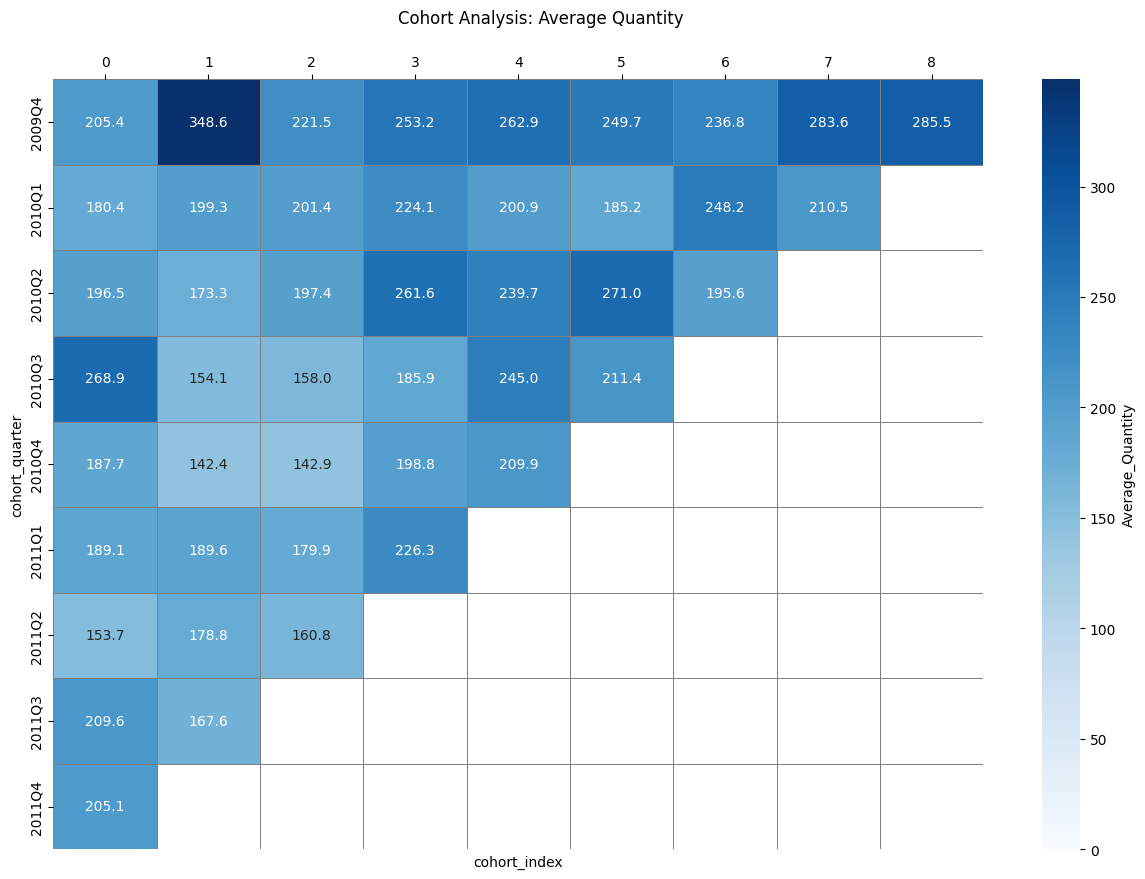

In [ ]:
# heatmap으로 시각화
plt.figure(figsize=(15,10))

quantity_heatmap = sns.heatmap(
    data=quantity_by_order_pivot,
    annot=True,
    fmt='.1f',
    cmap='Blues',
    cbar_kws={'label': 'Average_Quantity'},
    linewidths=0.5,
    linecolor='gray',
    vmin=0
)
quantity_heatmap.xaxis.tick_top()
plt.suptitle('Cohort Analysis: Average Quantity',x=0.45, y=0.95)
plt.show()

## 문제8: Revenue(ARPU)
각 고객의 월별 구매 금액을 집계하고, 이를 기반으로 ARPU를 분석하세요.

In [ ]:
# 월별, 고객별 매출의 합계 구하기
# 주문월을 나타내는 invoice_month 컬럼 생성
df['invoice_month'] = df['InvoiceDate'].dt.to_period('M')

# 월별 고객별 구매금액의 합 구하기
arpu = df.groupby(['invoice_month', 'Customer ID'])['Total'].sum().reset_index()

# 월별 이용고객 당 평균구매금액 집계
arpu = arpu.groupby('invoice_month')['Total'].mean()
arpu

,Total
invoice_month,
2009-12,634.710096
2010-01,678.102876
2010-02,607.949796
2010-03,572.454078
2010-04,562.068708
2010-05,527.235923
2010-06,521.881196
2010-07,568.992867
2010-08,609.187199


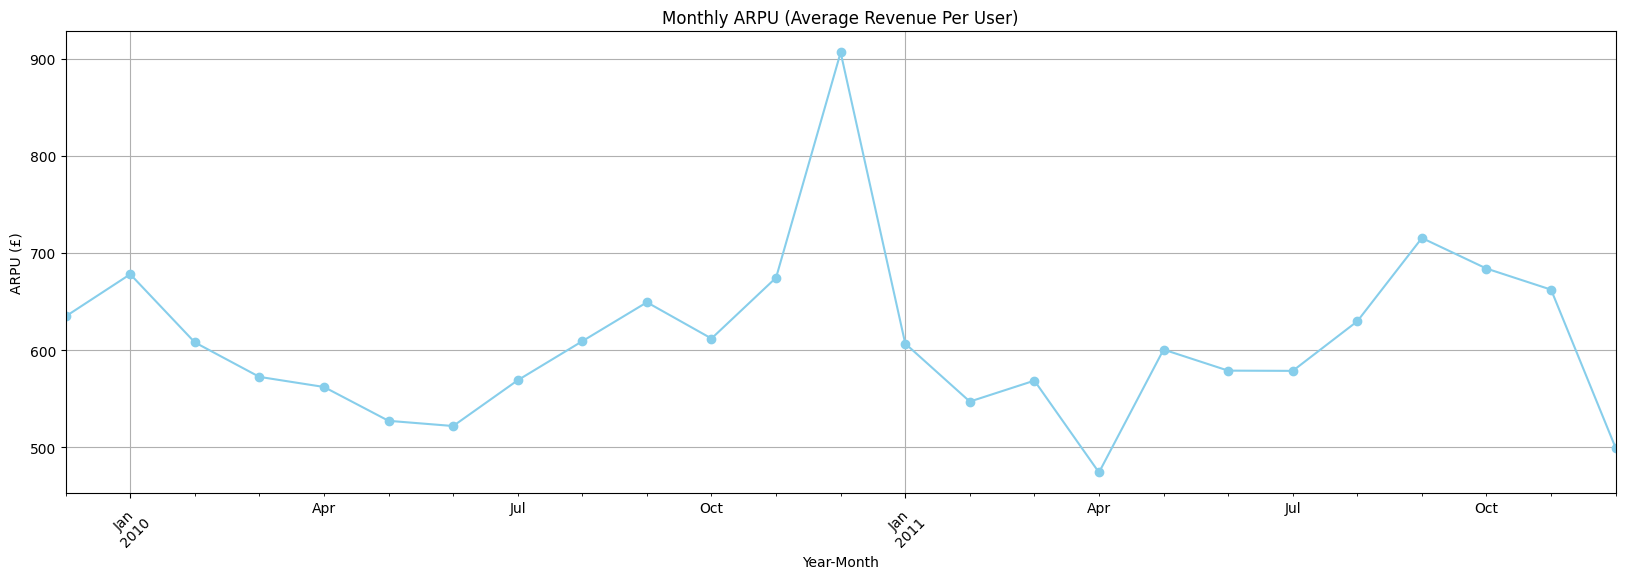

In [ ]:
# arpu 시각화하기
plt.figure(figsize=(20, 6))
arpu.plot(marker='o', color='skyblue')
plt.title("Monthly ARPU (Average Revenue Per User)")
plt.xlabel("Year-Month")
plt.ylabel("ARPU (£)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
## 다른 방법 ##
# arpu = (주문월마다 구매액수 합계) / (주문월마다 누적 고객)
# new_customers_by_month는 문제5에서 구해줌
arpu_2 = df.groupby(['invoice_month'])['Total'].sum() / new_customers_by_month.cumsum()
arpu_2

,0
invoice_month,
2009-12,634.710096
2010-01,369.745510
2010-02,272.342563
2010-03,284.817054
2010-04,222.109593
2010-05,201.629294
2010-06,187.609951
2010-07,173.922564
2010-08,173.385433


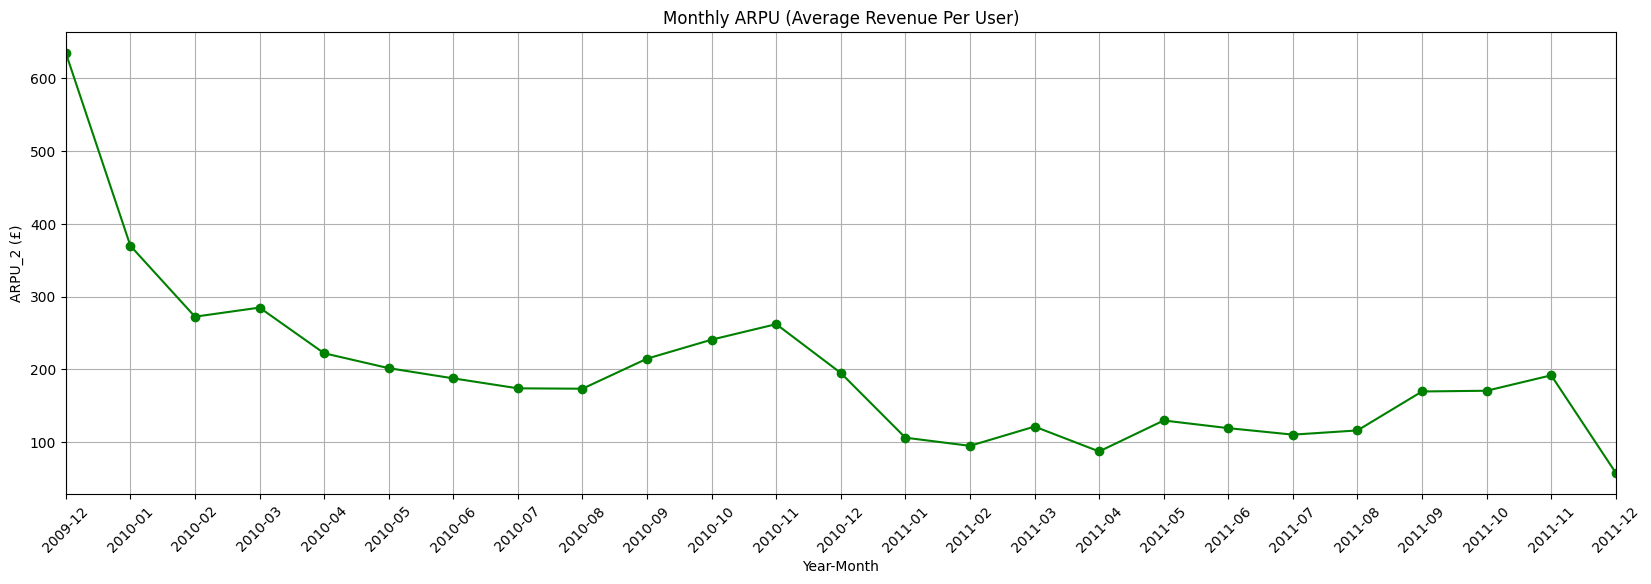

In [ ]:
# arpu_2 시각화하기
plt.figure(figsize=(20, 6))
arpu_2.plot(marker='o', color='green')
plt.title("Monthly ARPU (Average Revenue Per User)")
plt.xlabel("Year-Month")
plt.ylabel("ARPU_2 (£)")
plt.xticks(ticks = arpu_2.index, labels = arpu_2.index.astype(str), rotation=45)
plt.grid(True)
plt.show()

## 문제9: Revenue(CLV)
- 고객 생애 가치를 예측하기 위해 **CLV**를 계산하고 표로 CLV기준으로 내림차순으로 정렬해보세요
- **CLV 식: 평균금액 x  평균 구매 빈도 x 고객유지기간**(단, Invoice Date의 최대 최소를 빼준 뒤 1을 더해주기)

Q. 환불금액만 있는 고객의 데이터는 삭제해야 하는가?  
    - 삭제하지 않으면, 평균 구매 금액이 마이너스 처리되서 CLV역시 마이너스 값이 나온다.

Q. 현재 데이터로 고객의 유입날짜를 제대로 알기 어렵다. 그저 InvoiceDate가 가장 작은 시점부터 유입날짜로 받아들여질 뿐이다.

Q. 데이터의 전처리가 더 필요해보인다. 고객 별 월별 평균 구매 금액, 월별 구매 빈도를 구해 고객 평균 유지 기간을 곱해는 게 필요해보이지 않을까 싶다.

In [ ]:
# clv를 구하기 위한 데이터 전처리
from datetime import timedelta
import numpy as np
clv_table = df.groupby('Customer ID').agg({'Total':'sum',
                                           'Invoice':'nunique',
                                           'InvoiceDate': ['max', 'min']})
clv_table.columns = ['_'.join(col).strip() for col in clv_table.columns.values]
clv_table = clv_table.reset_index()
clv_table = clv_table.rename(columns = {'Invoice_nunique': 'Frequency'})
clv_table['Mean'] = np.round(clv_table['Total_sum'] / clv_table['Frequency'], 2)
clv_table['Lifespan'] = (clv_table['InvoiceDate_max'] - clv_table['InvoiceDate_min'] + timedelta(days = 1)).dt.days

# clv 구하기
pd.options.display.float_format = '{:.2f}'.format
clv_table['CLV'] = clv_table['Mean'] * clv_table['Frequency'] * clv_table['Lifespan'].mean()
clv_table.sort_values(by='CLV', ascending = False)

,Customer ID,Total_sum,Frequency,InvoiceDate_max,InvoiceDate_min,Mean,Lifespan,CLV
5746,18102,598215.22,153,2011-12-09,2009-12-01,3909.90,739,165731893.39
2293,14646,523342.07,163,2011-12-08,2009-12-02,3210.69,737,144988978.78
1804,14156,296564.69,202,2011-11-30,2009-12-01,1468.14,730,82161403.98
2557,14911,270248.53,510,2011-12-08,2009-12-01,529.90,738,74870909.15
5094,17450,233579.39,61,2011-12-01,2010-09-27,3829.17,431,64711802.04
...,...,...,...,...,...,...,...,...
4625,16981,-4620.86,1,2010-06-17,2010-06-17,-4620.86,1,-1280182.31
3405,15760,-5795.87,5,2010-03-19,2010-03-19,-1159.17,1,-1605706.44
3494,15849,-5876.34,1,2010-04-22,2010-04-22,-5876.34,1,-1628005.72
568,12918,-10953.50,3,2010-03-23,2010-03-23,-3651.17,1,-3034606.06


# 기초통계 문제

## 문제10
어떤 회사의 고객 대기시간은 5분에서 15분 사이의 균등분포를 따릅니다. 고객 100명이 대기한 시간을 시뮬레이션하고, 평균 대기시간과 표준편차를 계산하세요.

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

# 고객수
num_of_customers = 100

# 고객들이 대기한 시간
waiting_times = stats.uniform.rvs(loc=5, scale=10, size=num_of_customers)
# plt.hist(waiting_times, bins=10)

# 평균 대기시간
mean_waiting_time = np.mean(waiting_times)

# 대기시간의 표본표준편차
std_waiting_time = np.std(waiting_times, ddof=1)

# 평균 대기시간과 표본표준편차 출력
print(f'평균 대기시간: {mean_waiting_time: .2f}')
print(f'대기시간의 표본표준편차: {std_waiting_time:.2f}')

평균 대기시간:  9.64
대기시간의 표본표준편차: 2.67


## 문제11

한 신제품의 초기 성공 확률이 0.3이라고 가정합니다. 10회의 시뮬레이션에서 성공한 횟수를 구하고, 각 성공 여부를 출력하세요.

- 방법
  - 한 제품의 성공확률이 0.3이고 제품이 성공하는 하나의 사건은 베르누이 시행이다.
  - 베르누이 시행을 시뮬레이션으로 10개의 확률변수를 구한 뒤, 성공횟수를 구한다.


In [ ]:
# 베르누이 시행을 10번 수행
outcomes = stats.bernoulli.rvs(p=0.3, size=10)  # 각 시도 결과
success_count = outcomes.sum()  # 성공횟수

print(f"각 시도 결과: {outcomes}")
print(f"성공 횟수: {success_count:.2f}")

각 시도 결과: [0 0 0 0 0 0 1 0 0 0]
성공 횟수: 1.00


## 문제12
한 수업에서 학생 20명이 5문제로 구성된 퀴즈를 치릅니다. 각 문제의 정답 확률은 0.7이라고 가정할 때, 각 학생이 맞힌 점수를 시뮬레이션하고, 전체 학생의 평균 점수를 계산하세요.

- 방법
  - 각 문제의 정답 확률이 0.7이고 각 문제를 맞추는 사건이 서로 독립일 때 5문제 중 문제를 맞추는 개수는 이항분포를 따른다.
  - 해당 분포에 대한 20개의 확률변수를 구하고, 평균점수를 구한다.

In [ ]:
# 학생 20명에 대해, 정답확률이 0.7이고 5문제에 대해 맞춘 정답 수
scores = stats.binom.rvs(5, p=0.7, size=20)
average_score = np.mean(scores)

print(f'학생별 점수: {scores}')
print(f'평균 점수: {average_score:.2f}')

학생별 점수: [5 4 3 4 5 1 4 3 5 2 4 3 3 4 5 3 5 3 5 5]
평균 점수: 3.80


## 문제13
한 공장에서 생산되는 제품의 무게는 평균 50g, 표준편차 5g의 정규분포를 따릅니다.1000개의 제품 무게를 시뮬레이션하고, 무게가 45g 이상 55g 이하인 제품의 비율을 계산(변수명: within_range)하세요. 무게 분포의 히스토그램을 그리세요.


In [ ]:
# 평균 50g, 표준편차 5g의 정규분포를 따르는 확률변수
weights = stats.norm.rvs(loc=50, scale=5, size=1000)
# print(np.shape(weights))
# plt.hist(weights)

# 무게가 45g 이상 55g 이하인 제품의 비율을 계산
conds = (weights >= 45) & (weights <= 55)
within_range = len(weights[conds]) / len(weights)

print(f"45g 이상 55g 이하 비율: {within_range:.2%}")

45g 이상 55g 이하 비율: 68.90%


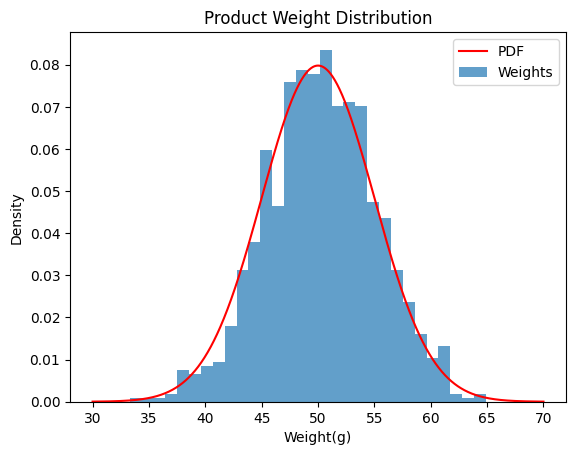

In [ ]:
# 무게분포의 히스토그램
import seaborn as sns
plt.hist(weights, density = True, bins = 30, alpha = 0.7)

# 비교 - 평균 50, 표준편차 5의 정규분포 pdf
x = np.linspace(30, 70, num = 1000)
y =stats.norm.pdf(x, loc=50, scale=5)
plt.plot(x, y, color = 'red')

plt.title('Product Weight Distribution')
plt.xlabel('Weight(g)')
plt.ylabel('Density')
plt.legend(labels =['PDF', 'Weights'])
plt.show()